# Regresion Basica: Predecir eficiencia de gasolina

Este libro usa el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) y construye un modelo para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Este ejemplo usa el API `tf.keras` , revise [Esta Guia](https://www.tensorflow.org/guide/keras) para obtener mas detalles.

In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.19.0


In [2]:
import numpy as np

## El set de Datos de MPG

El set de datos esta disponible de el siguiente repositorio [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).

### Obtenga los datos
Primero descargue el set de datos.

In [3]:
dataset_path = keras.utils.get_file("auto-mpg.data",
                                    "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\Usuario\\.keras\\datasets\\auto-mpg.data'

In [4]:
pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", sep="\t")

,18.0 8 307.0 130.0 3504. 12.0 70 1,chevrolet chevelle malibu
0,15.0 8 350.0 165.0 3693. 11...,buick skylark 320
1,18.0 8 318.0 150.0 3436. 11...,plymouth satellite
2,16.0 8 304.0 150.0 3433. 12...,amc rebel sst
3,17.0 8 302.0 140.0 3449. 10...,ford torino
4,15.0 8 429.0 198.0 4341. 10...,ford galaxie 500
...,...,...
392,27.0 4 140.0 86.00 2790. 15...,ford mustang gl
393,44.0 4 97.00 52.00 2130. 24...,vw pickup
394,32.0 4 135.0 84.00 2295. 11...,dodge rampage
395,28.0 4 120.0 79.00 2625. 18...,ford ranger


Importelo usando pandas.

In [5]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']

In [16]:
# raw_dataset = pd.read_csv(dataset_path, names = column_names, na_values='?', sep= ' ', comment = '\t', skipinitialspace = True)
# raw_dataset

In [6]:
raw_dataset = pd.read_fwf(dataset_path, names = column_names)
raw_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


In [7]:
dataset = raw_dataset.copy()

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
# describe include all

dataset.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### Limpia los datos

Trata los missings y variables categóricas

In [10]:
# suma de los nans

dataset["Horsepower"].iloc[32]


'?'

In [11]:
# buscar el valor anomalo en la columna Horsepower

filas_con_signo = dataset[dataset["Horsepower"] == '?']
filas_con_signo

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
32,25.0,4,98.0,?,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,?,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,?,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,?,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,?,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,?,3035.0,20.5,82,1,"""amc concord dl"""


In [12]:
# eliminar las columnas con este valor anomalo y conviertela a float

df2 = dataset[dataset["Horsepower"] != '?']


In [13]:

df2["Horsepower"] = pd.to_numeric(df2["Horsepower"], errors='coerce')


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13328\1436705512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Horsepower"] = pd.to_numeric(df2["Horsepower"], errors='coerce')


In [14]:
# drop car name, el name no suele ser buena columna...

df3 = df2.drop("Car Name",axis=1)

In [15]:
origin = df3.pop('Origin')


In [16]:


(origin == 1).astype(int)

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    0
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

In [17]:
# se puede hacer con get_dummies

df3['USA'] = (origin == 1).astype("int")
df3['Europe'] = (origin == 2)*1
df3['Japan'] = (origin == 3)*1

In [18]:
df3.Cylinders.unique()

array([8, 4, 6, 3, 5])

In [19]:
df3.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


### Divide los datos en train y test

Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo.

NOTA: El resultado tienen que ser dos datasets

In [20]:
train_dataset = df3.sample(frac=0.8, random_state = 0)
test_dataset = df3.drop(train_dataset.index)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df3.iloc[:, 1:], df3.iloc[:, 0])

In [23]:
y_train

243    21.5
385    38.0
82     23.0
241    22.0
180    25.0
       ... 
83     28.0
125    20.0
52     30.0
218    36.0
45     18.0
Name: MPG, Length: 294, dtype: float64

### Inspecciona los datos

Revise rapidamente la distribucion conjunta del dataset de entrenamiento mediante un grid de gráficos

In [24]:
# columnas de train

X_train.columns

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration',
       'Model Year', 'USA', 'Europe', 'Japan'],
      dtype='object')

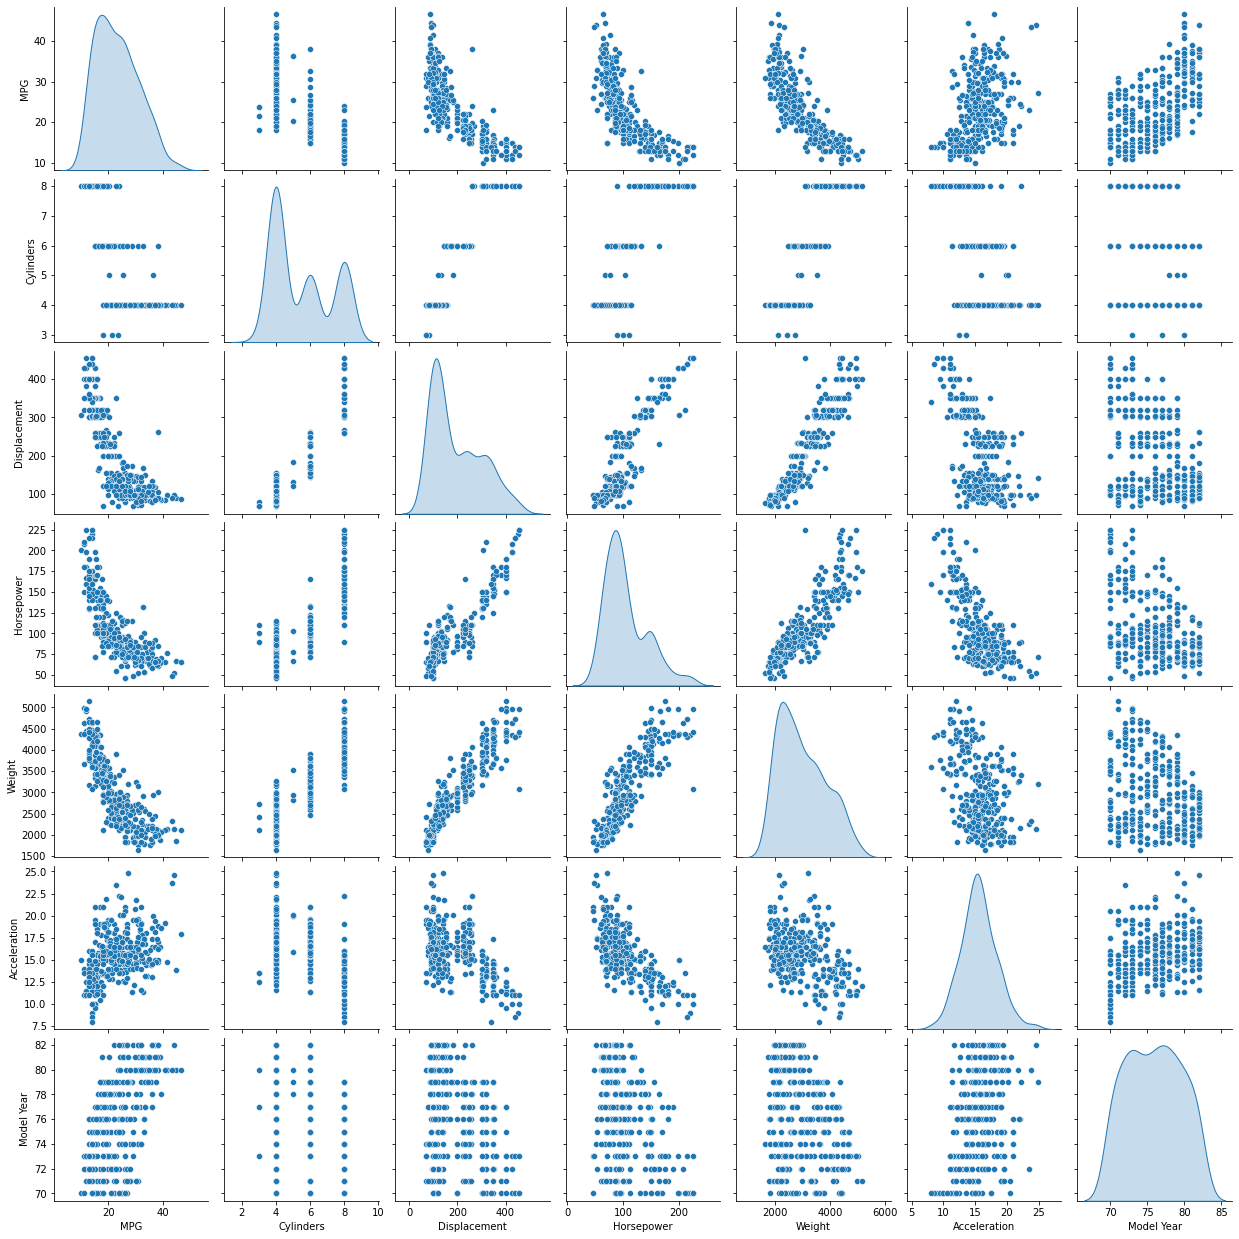

In [ ]:
# pairplot , diag_kind = 'kde'

Tambien revise las estadisticas generales:

In [25]:
train_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.624204,0.178344,0.197452
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.485101,0.383413,0.398712
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [26]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.T
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


### Separa las features del target

Separe el target de las features.

In [27]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

### Estandariza los datos

Es una buena práctica estandarizar funciones que utilizan diferentes escalas y rangos. Aunque el modelo podría converger sin estandarizar, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada.

In [28]:
def norm(x):
    return (x - train_stats['mean'])/train_stats['std']

from sklearn.preprocessing import StandardScaler

st_scaler = StandardScaler()
st_scaler.fit(train_dataset)

normed_train_data = st_scaler.transform(train_dataset)
normed_test_data = st_scaler.transform(test_dataset)

#normed_train_data = norm(train_dataset)
#normed_test_data = norm(test_dataset)

print(normed_train_data.shape)
print(normed_test_data.shape)

# Podemos utilizar scalados de sklearn

(314, 9)
(78, 9)


In [29]:
normed_train_data[0]

array([-0.87073567, -1.01107037, -0.78530384, -1.02693936, -0.38036536,
       -0.51722083,  0.77591289, -0.46589083, -0.49601587])

Estos datos estandarizados es lo que usaremos para entrenar el modelo.

## El modelo

### Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo.

Por tanto, tendrá tres capas. Una de entrada con activación relu. Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres para las dos primeras capas.

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

In [30]:
normed_train_data

array([[-0.87073567, -1.01107037, -0.78530384, ...,  0.77591289,
        -0.46589083, -0.49601587],
       [-0.87073567, -0.53106418, -0.44351791, ...,  0.77591289,
        -0.46589083, -0.49601587],
       [ 1.48625572,  1.48496183,  1.44945034, ...,  0.77591289,
        -0.46589083, -0.49601587],
       ...,
       [-0.87073567, -0.83826814, -0.31206178, ..., -1.28880447,
        -0.46589083,  2.01606452],
       [-0.87073567, -1.07827123, -1.153381  , ..., -1.28880447,
        -0.46589083,  2.01606452],
       [-0.87073567, -0.84786826, -0.49610036, ..., -1.28880447,
         2.1464256 , -0.49601587]])

In [31]:
normed_train_data.shape

(314, 9)

In [ ]:
# modelo secuencial

# dos capas con 64 y una densa de salida para regresion

# compilamos con mse, adam y metricas mae y mse

In [32]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(64, activation="relu",input_shape=(9,)))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(1))


c:\Users\Usuario\miniconda3\envs\data_analysis_env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Inspeccione el modelo

Use el método `.summary` para imprimir una descripción simple del modelo

In [33]:
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenar el modelo

Entrene el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

NOTA: recuerda usar los datos normalizados.

In [ ]:
# model fit
# con normed_train_data y train_labels, epocas 1000, validation_split 0.2

In [34]:
model.compile(loss="mse",optimizer="adam",metrics=["mae"])
history = model.fit(normed_train_data,train_labels,epochs=1000,validation_split=0.2)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 598.5265 - mae: 23.3148 - val_loss: 605.1989 - val_mae: 23.3310
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 593.2747 - mae: 23.0557 - val_loss: 571.5159 - val_mae: 22.6054
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 555.5046 - mae: 22.2806 - val_loss: 534.8185 - val_mae: 21.7920
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 509.3202 - mae: 21.2461 - val_loss: 491.1148 - val_mae: 20.7825
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 462.7927 - mae: 20.2348 - val_loss: 438.8748 - val_mae: 19.5123
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 407.4398 - mae: 18.7843 - val_loss: 377.5509 - val_mae: 17.9186
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 371.3969 - mae: 17.8580 - val_loss: 307.9928 - val_mae: 15.9436
Epoch 8/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 281.8270 - mae: 15.2310 - val_loss: 235.9367 - val_mae: 13.7030
Epoch 9/1000
8/8 

Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`.

In [35]:
df_hist = pd.DataFrame(history.history)
df_hist['epoch'] = history.epoch
df_hist

,loss,mae,val_loss,val_mae,epoch
0,596.562378,23.178728,605.198853,23.330988,0
1,565.989746,22.511456,571.515869,22.605379,1
2,534.929260,21.827471,534.818542,21.792006,2
3,499.934631,21.021404,491.114838,20.782497,3
4,457.473114,20.010284,438.874786,19.512289,4
...,...,...,...,...,...
995,1.901331,0.836105,7.806273,2.192001,995
996,1.903488,0.838339,7.846486,2.196345,996
997,1.910141,0.835068,7.897640,2.197865,997
998,1.911292,0.840346,8.152585,2.242801,998


In [36]:
df_hist.head(50)

,loss,mae,val_loss,val_mae,epoch
0,596.562378,23.178728,605.198853,23.330988,0
1,565.989746,22.511456,571.515869,22.605379,1
2,534.929260,21.827471,534.818542,21.792006,2
3,499.934631,21.021404,491.114838,20.782497,3
4,457.473114,20.010284,438.874786,19.512289,4
5,406.212738,18.734940,377.550903,17.918550,5
6,348.257080,17.153765,307.992798,15.943588,6
7,280.126343,15.183600,235.936691,13.702991,7
8,212.311035,13.038630,165.843597,11.304289,8
9,149.771591,10.730146,105.972473,8.905803,9


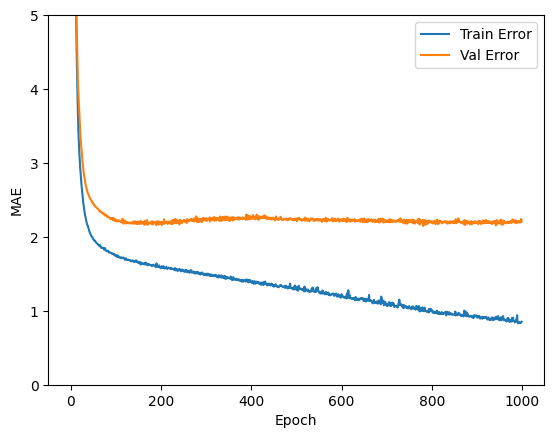

In [37]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.plot(df_hist['epoch'], df_hist['mae'], label=['Train Error'] )
plt.plot(df_hist['epoch'], df_hist['val_mae'], label=['Val Error'] )
plt.ylim([0,5])

plt.legend()

KeyError: 'mse'

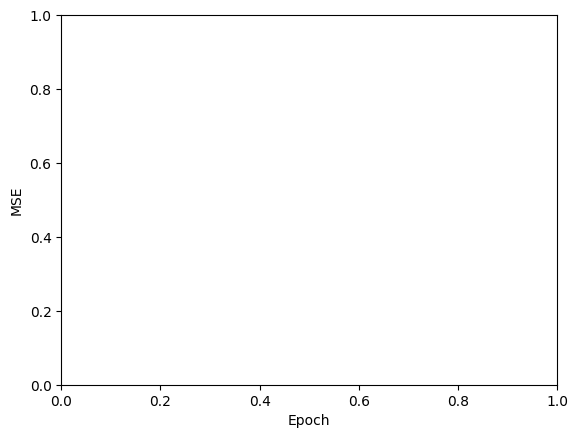

In [38]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(df_hist['epoch'], df_hist['mse'], label=['Train Error'] )
plt.plot(df_hist['epoch'], df_hist['val_mse'], label=['Val Error'] )
plt.ylim([0,20])
plt.legend()

In [50]:
def plot_history(history, ylim1=(0,20), ylim2=(0,20)):
    df_hist = pd.DataFrame(history.history)
    df_hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.plot(df_hist['epoch'], df_hist['mae'], label=['Train Error'] )
    plt.plot(df_hist['epoch'], df_hist['val_mae'], label=['Val Error'] )
    plt.ylim(ylim1)
    plt.legend()
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.plot(df_hist['epoch'], df_hist['mse'], label=['Train Error'] )
    plt.plot(df_hist['epoch'], df_hist['val_mse'], label=['Val Error'] )
    plt.ylim(ylim2)
    plt.legend()

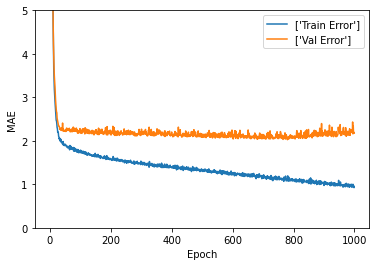

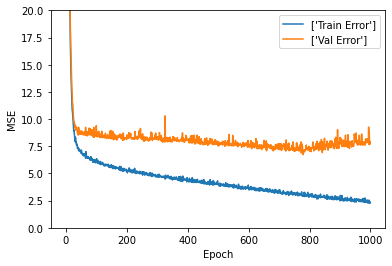

In [51]:
plot_history(history, ylim1 = (0,5))

¿Alguna conclusión respecto a este gráfico?

# BONUS TRACK!!
Investigadme esto

Añade un early stopping al modelo. Pon el argumento `callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]` dentro del fit().

Después del entrenamiento utiliza la función del apartado anterior `plot_history(history)`.

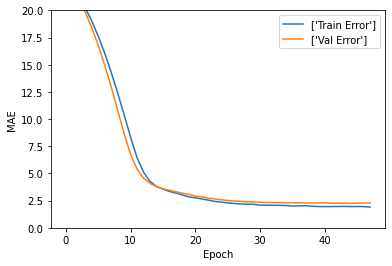

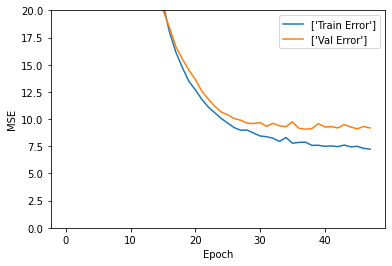

In [52]:
# HAY QUE REPETIR EL MODELO PERO CON EARLY STOPPING Y  PATIENCE 10
# [keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
plot_history(history)

# SE ACABO EL BONUS TRACK, ESTO SI!!!

Interpreta el gráfico

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [53]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels)
mae

3/3 [==============================] - 0s 7ms/step - loss: 5.8860 - mae: 1.8805 - mse: 5.8860


1.8805148601531982

In [54]:
from sklearn.metrics import r2_score

In [56]:
r2_score(test_labels, model.predict(normed_test_data))

3/3 [==============================] - 0s 16ms/step


0.9098707930246225

In [57]:
model.save("my_keras_model_MAE_1_96.h5")

Ahora prueba el modelo. Coge 10 ejemplos de train y llama a` model.predict`.

In [58]:
result_10 = model.predict(normed_train_data[:10])
result_10

1/1 [==============================] - 0s 48ms/step


array([[28.6878  ],
       [23.859838],
       [12.288491],
       [37.891945],
       [35.145065],
       [20.377728],
       [37.250618],
       [30.458727],
       [18.288368],
       [25.042332]], dtype=float32)

### Haz Predicciones

Dibuja en un scatter plot las predicciones de test vs sus true labels.

3/3 [==============================] - 0s 17ms/step


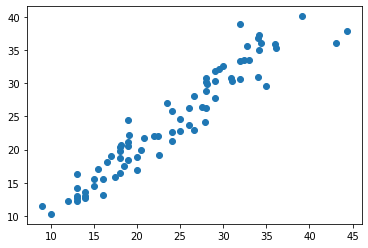

In [59]:
test_predictions = # PREDICCIONES CON norm_test_data
plt.scatter(test_labels, test_predictions)

Parece que nuestro modelo predice razonablemente bien. Echemos un vistazo a la distribución de errores.

Representa los residuos en un histograma

(array([ 2.,  1.,  5.,  7., 21., 15., 17.,  8.,  1.,  1.]),
 array([-7.08172379, -5.68148064, -4.28123749, -2.88099434, -1.48075119,
        -0.08050804,  1.31973511,  2.71997826,  4.12022141,  5.52046455,
         6.9207077 ]),
 <BarContainer object of 10 artists>)

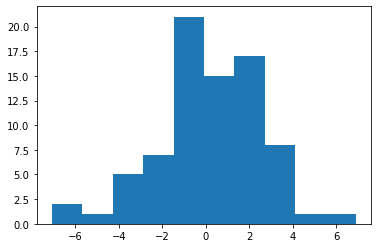

In [60]:
error = test_predictions - test_labels

plt.hist(error)

No es del todo gaussiano, pero podríamos esperar eso porque el número de muestras es muy pequeño.

## Conclusion

Este cuaderno introdujo algunas técnicas para manejar un problema de regresión.

* El error cuadrático medio (MSE) es una función de pérdida común utilizada para problemas de regresión (se utilizan diferentes funciones de pérdida para problemas de clasificación).
* Del mismo modo, las métricas de evaluación utilizadas para la regresión difieren de la clasificación. Una métrica de regresión común es el error absoluto medio (MAE).
* Cuando las características de datos de entrada numéricos tienen valores con diferentes rangos, cada característica debe escalarse independientemente al mismo rango.
* Si no hay muchos datos de entrenamiento, una técnica es preferir una red pequeña con pocas capas ocultas para evitar el sobreajuste.
* La detención temprana es una técnica útil para evitar el sobreajuste.

In [58]:
model_loaded = keras.models.load_model("my_keras_model_MAE_1_96.h5")

test_predictions = model_loaded.predict(normed_test_data).flatten()

In [59]:
test_predictions

array([15.724552 , 11.683048 , 12.47341  , 23.602165 , 21.050465 ,
       13.462151 , 13.192361 , 13.379283 , 19.690887 , 30.02945  ,
       25.153633 , 24.985764 , 14.308925 , 25.710617 , 12.290881 ,
       13.581768 , 14.205824 , 13.1787195, 18.890953 , 12.687322 ,
       12.934426 , 25.826237 , 19.114384 , 20.23384  , 30.077175 ,
       23.496483 , 15.980178 , 23.140163 , 16.474903 , 20.652336 ,
       28.213821 , 21.355206 , 18.866337 , 21.765427 , 26.150589 ,
       15.740327 , 19.379036 , 32.69873  , 30.529648 , 17.15385  ,
       31.238178 , 29.412548 , 15.778153 , 35.69676  , 34.388645 ,
       35.85762  , 20.508686 , 22.531406 , 20.841087 , 26.521431 ,
       30.363766 , 19.66843  , 32.53331  , 18.567234 , 17.504608 ,
       17.673996 , 33.953976 , 35.18694  , 22.246986 , 24.395443 ,
       38.045296 , 33.432056 , 28.231087 , 28.207329 , 32.5648   ,
       39.756073 , 37.1423   , 36.268513 , 34.033016 , 29.40741  ,
       22.342922 , 21.964573 , 29.8344   , 31.03479  , 36.1142